
***

## Dynamic Price Prediction  

Given *data about Lyft and Uber rides*, let's try to predict the **price** of a given ride.  
  
We will use a linear regression model to make our predictions.

# Getting Started

In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [16]:
rides_df = pd.read_csv("cab_rides.csv")
weather_df = pd.read_csv("weather.csv")

In [17]:
rides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [18]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [19]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58


In [20]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
temp          6276 non-null float64
location      6276 non-null object
clouds        6276 non-null float64
pressure      6276 non-null float64
rain          894 non-null float64
time_stamp    6276 non-null int64
humidity      6276 non-null float64
wind          6276 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.3+ KB


# Cleaning Ride Data

In [21]:
rides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [22]:
rides_df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [23]:
rides_df = rides_df.dropna(axis=0).reset_index(drop=True)

# Cleaning Weather Data

In [24]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58


In [25]:
weather_df.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [26]:
weather_df = weather_df.fillna(0)

# Creating Average Weather DataFrame

In [27]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58


In [28]:
# converting the timestamp data into real date format
rides_df['date'] = pd.to_datetime(rides_df['time_stamp']/ 1000, unit = 's')
weather_df['date'] = pd.to_datetime(weather_df['time_stamp'], unit = 's')

In [29]:
# Creating the new column that contain the location and 
rides_df['merged_date'] = rides_df['source'].astype('str') + ' - ' + rides_df['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + rides_df['date'].dt.hour.astype('str')
weather_df['merged_date'] = weather_df['location'].astype('str') + ' - ' + weather_df['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + weather_df['date'].dt.hour.astype('str')

In [30]:
#  df_rides['date'].dt.strftime('%m').head()
weather_df.index = weather_df['merged_date']

In [31]:
# Join the weather date on rides data
df_joined = rides_df.join(weather_df, on = ['merged_date'], rsuffix ='_w')

The rides and weather data have been joined by merged_date column.

In [32]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167730 entries, 0 to 637975
Data columns (total 22 columns):
distance            1167730 non-null float64
cab_type            1167730 non-null object
time_stamp          1167730 non-null int64
destination         1167730 non-null object
source              1167730 non-null object
price               1167730 non-null float64
surge_multiplier    1167730 non-null float64
id                  1167730 non-null object
product_id          1167730 non-null object
name                1167730 non-null object
date                1167730 non-null datetime64[ns]
merged_date         1167730 non-null object
temp                1164996 non-null float64
location            1164996 non-null object
clouds              1164996 non-null float64
pressure            1164996 non-null float64
rain                1164996 non-null float64
time_stamp_w        1164996 non-null float64
humidity            1164996 non-null float64
wind                1164996 non-null

In [33]:
df_joined['id'].value_counts()

86e935fa-54b3-4cb8-997c-74c663bb9ef2    15
23e03759-b9d6-4888-895f-221526020e29    15
240bb5fc-f851-47fa-9f89-30e6d694b8fb    15
e28bf040-faec-4d81-8bb5-c796c5deeda2    15
d95075e8-db74-4307-b66a-4ba790888f9b    15
bc047539-21ca-4c7a-9634-6a14856570bb    15
d54745a1-ad88-4b6b-aed2-1c7861ce8f3a    15
cc3944c1-7d81-400e-8563-8b431fbaec33    15
71cea9f3-bcf2-49e6-995b-901f3304203b    15
3e1202cd-d177-4b6c-b4c5-678cc7230622    15
8eff623b-3cd7-4bc4-a95b-8467d613151d    15
09c91b4b-c014-445c-8d00-71aff81081cb    15
b3287c71-2104-4d46-8732-867f268c025d    15
80671ec2-5a16-4026-a49c-f909143b7e1f    15
5beb66c7-0c64-482b-a36e-8404d7df5558    15
9764567d-e638-4829-af68-a6552ec1d707    15
51898063-0b8a-48d7-89e9-7f20a604941f    15
f97929b8-ec2a-42c2-b4b1-b4b0d299ba9b    15
1b446c5a-efd1-4004-9275-13bb456af595    15
313061a9-7df5-4df1-8450-9dc1b1c61804    15
fe058542-7246-46a5-b879-20629a8af25d    15
3bdaf96f-6a99-477e-b007-718f4fd9a7bd    15
7f60e296-42e1-4742-a5fd-49bf1e56a349    15
35290113-2f

In [34]:
df_joined[df_joined['id'] == '865b44b9-4235-4e8e-b6fd-bc8373e95b63'].iloc[:,10:22]

,date,merged_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_w,merged_date_w
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,40.51,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.28,2018-11-26 06:16:45,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,41.61,Financial District,0.98,1014.35,0.0,1.543215e+09,0.91,1.82,2018-11-26 06:49:02,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,40.50,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.27,2018-11-26 06:15:45,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,40.49,Financial District,1.00,1014.18,0.0,1.543213e+09,0.91,1.22,2018-11-26 06:12:14,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,43.95,Financial District,1.00,1014.18,0.0,1.543213e+09,0.80,1.38,2018-11-26 06:24:04,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,43.97,Financial District,1.00,1014.18,0.0,1.543214e+09,0.81,1.45,2018-11-26 06:29:03,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,41.65,Financial District,0.98,1014.31,0.0,1.543215e+09,0.90,1.76,2018-11-26 06:50:30,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,40.50,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.25,2018-11-26 06:14:16,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,41.61,Financial District,0.98,1014.35,0.0,1.543215e+09,0.91,1.83,2018-11-26 06:49:43,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999994,Financial District - 2018-11-26 - 6,40.51,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.28,2018-11-26 06:16:15,Financial District - 2018-11-26 - 6


In [35]:
id_group = pd.DataFrame(df_joined.groupby('id')['temp','clouds', 'pressure', 'rain', 'humidity', 'wind'].mean())
df_rides_weather = rides_df.join(id_group, on = ['id'])

In [36]:
# Creating the columns for Month, Hour and Weekdays 
df_rides_weather['Month'] = df_rides_weather['date'].dt.month
df_rides_weather['Hour'] = df_rides_weather['date'].dt.hour
df_rides_weather['Day'] =  df_rides_weather['date'].dt.strftime('%A')

In [37]:
# The distribution of rides in weekdays 
import matplotlib.pyplot as plt
uber_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['Day'].value_counts()
uber_day_count = uber_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])
lyft_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['Day'].value_counts()
lyft_day_count = lyft_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])

fig , ax = plt.subplots(figsize = (12,12))
ax.plot(uber_day_count.index, uber_day_count, label = 'Uber')
ax.plot(lyft_day_count.index, lyft_day_count, label = 'Lyft')
ax.set(ylabel = 'Number of Rides', xlabel = 'Weekdays')
ax.legend()
plt.show()

<Figure size 1200x1200 with 1 Axes>

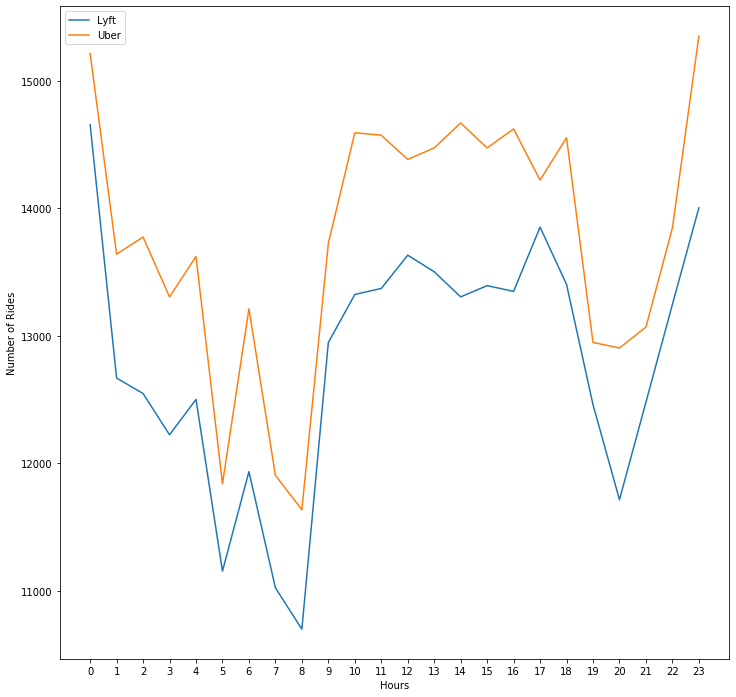

In [38]:
# The ride distribution in one day 
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('Hour').Hour.count(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Number of Rides')
plt.xticks(range(0,24,1))
plt.show()


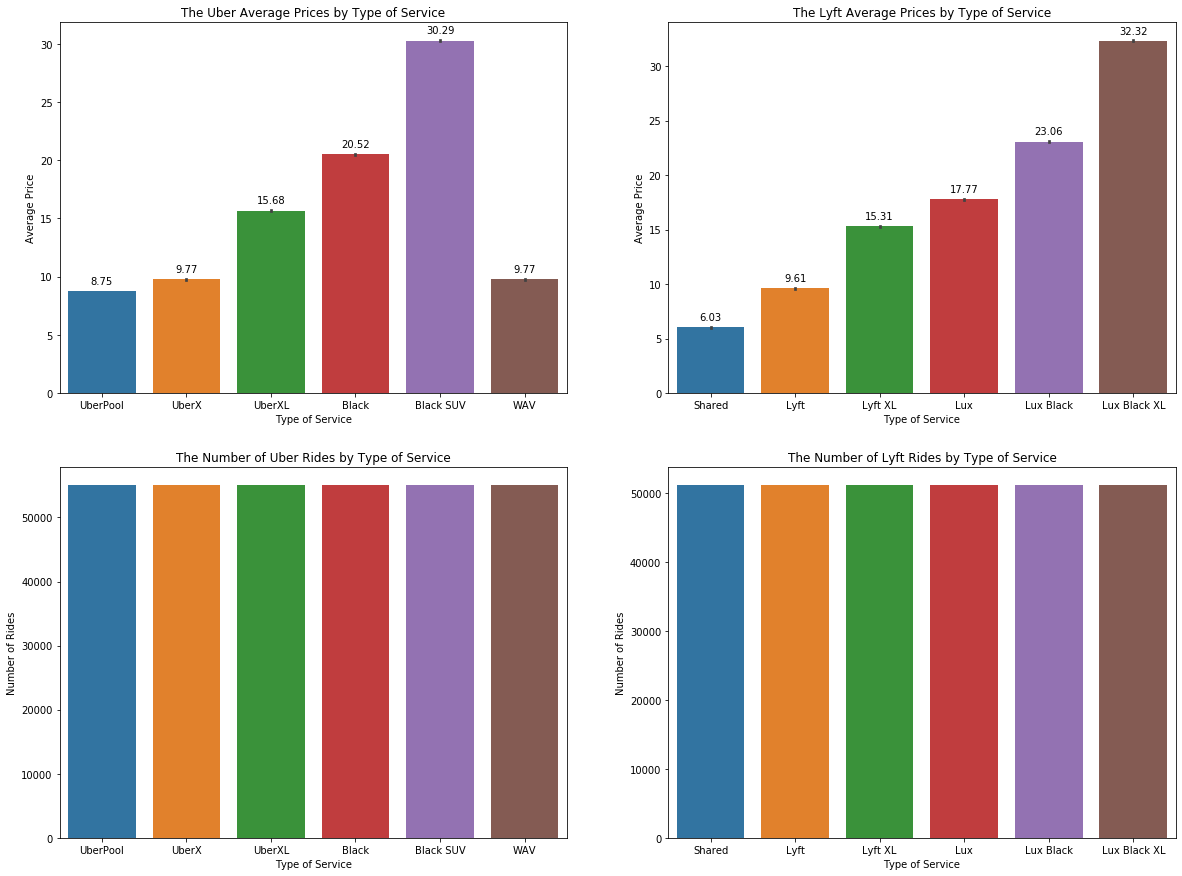

In [39]:
# The Average price of rides by type of service
import seaborn as sns

uber_order =[ 'UberPool', 'UberX', 'UberXL', 'Black','Black SUV','WAV' ]
lyft_order = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']
fig, ax = plt.subplots(2,2, figsize = (20,15))
ax1 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].price , ax = ax[0,0], order = uber_order)
ax2 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].price , ax = ax[0,1], order = lyft_order)
ax3 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count(), ax = ax[1,0] ,order = uber_order)
ax4 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count(), ax = ax[1,1],order = lyft_order)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax2.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax3.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax4.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax1.set_title('The Uber Average Prices by Type of Service')
ax2.set_title('The Lyft Average Prices by Type of Service')
ax3.set_title('The Number of Uber Rides by Type of Service')
ax4.set_title('The Number of Lyft Rides by Type of Service')
plt.show()

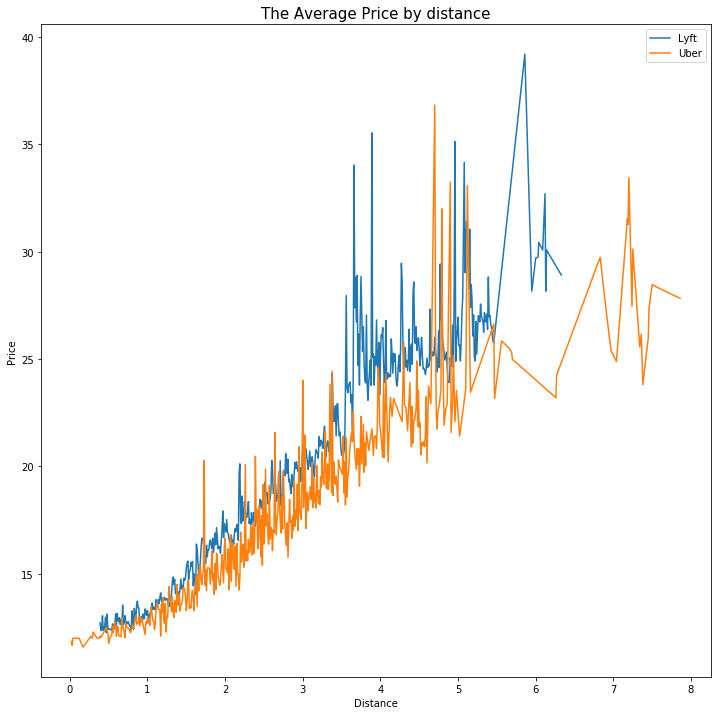

In [40]:
# The average price by distance
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('distance').price.mean(), label = 'Uber')
ax.set_title('The Average Price by distance', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()


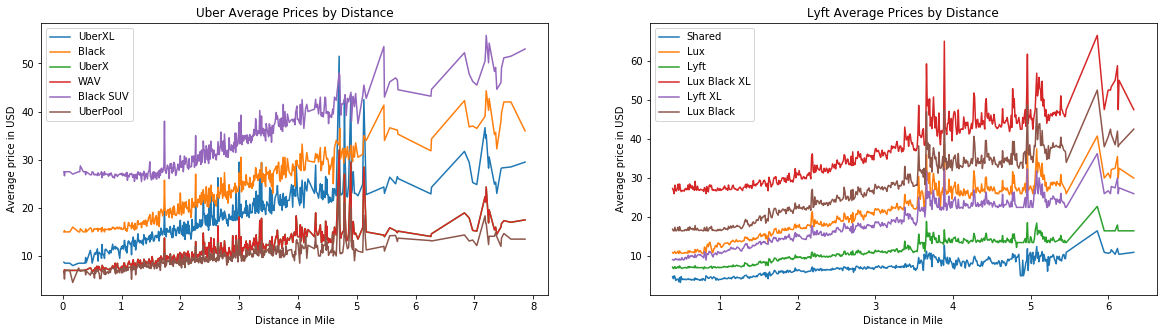

In [41]:
# The average price by distance 
fig, ax = plt.subplots(1,2 , figsize = (20,5))
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['name'].unique()):
    ax[0].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['name'].unique()):
    ax[1].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()
plt.show()


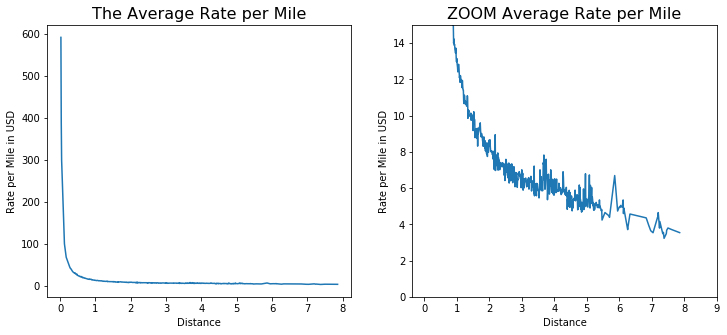

In [42]:
# the average rate per mile
df_rides_weather['rate_per_mile'] = round((df_rides_weather['price'] / df_rides_weather['distance'] ),2)
# The average rate per mile plot
fig, ax = plt.subplots(1,2,figsize = (12,5))
ax1 = sns.lineplot(x = df_rides_weather.groupby(['distance'])['rate_per_mile'].mean().index, y = df_rides_weather.groupby('distance')['rate_per_mile'].mean(), ax = ax[0])
ax2 = sns.lineplot(x = df_rides_weather.groupby(['distance'])['rate_per_mile'].mean().index, y = df_rides_weather.groupby('distance')['rate_per_mile'].mean(), ax = ax[1])
plt.xticks(range(0, 10,1))
ax1.set(xlabel = 'Distance', ylabel = 'Rate per Mile in USD')
ax2.set(xlabel = 'Distance', ylabel = 'Rate per Mile in USD', ylim = (0,15))
ax1.set_title('The Average Rate per Mile', fontsize = 16)
ax2.set_title('ZOOM Average Rate per Mile', fontsize = 16)
plt.show()

In [43]:
# Scatter chart for Rate per mile and distance
    # pivot table to calculate average rate based on cab_type, service type(name) and distance
rates_per_mile_pivot = df_rides_weather.pivot_table(index = ['cab_type', 'name', 'distance'] , values = ['rate_per_mile'])
rates_per_mile_pivot.reset_index(inplace = True)

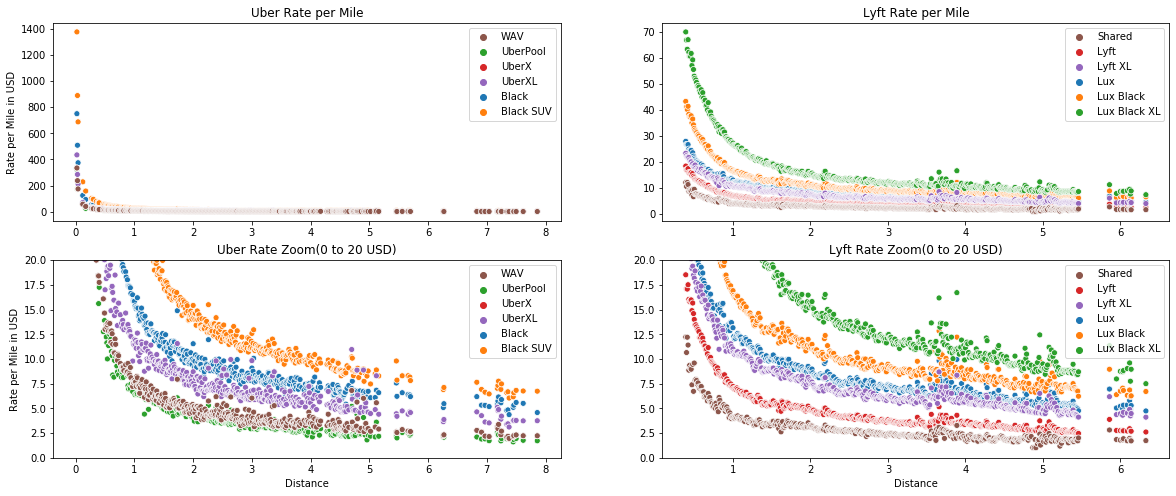

In [44]:
fig, ax = plt.subplots(2,2, figsize = (20,8))
ax1 = sns.scatterplot(x = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Uber']['distance'], y = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Uber']['rate_per_mile'], hue = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Uber']['name'], ax = ax[0,0])
ax2 = sns.scatterplot(x = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Uber']['distance'], y = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Uber']['rate_per_mile'], hue = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Uber']['name'], ax = ax[1,0])
ax2.set( ylim = (0,20))
ax3 = sns.scatterplot(x = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Lyft']['distance'], y = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Lyft']['rate_per_mile'], hue = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Lyft']['name'], ax = ax[0,1])
ax4 = sns.scatterplot(x = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Lyft']['distance'], y = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Lyft']['rate_per_mile'], hue = rates_per_mile_pivot[rates_per_mile_pivot['cab_type'] == 'Lyft']['name'], ax = ax[1,1])
ax4.set( ylim = (0,20))
handles_uber, labels_uber = ax1.get_legend_handles_labels()
handles_uber = [handles_uber[6],handles_uber[3],handles_uber[4],handles_uber[5],handles_uber[1],handles_uber[2]]
labels_uber = [labels_uber[6],labels_uber[3],labels_uber[4],labels_uber[5],labels_uber[1],labels_uber[2]]
ax1.legend(handles_uber, labels_uber)
ax2.legend(handles_uber, labels_uber)
handles_lyft, labels_lyft = ax3.get_legend_handles_labels()
handles_lyft = [handles_lyft[6],handles_lyft[4],handles_lyft[5],handles_lyft[1],handles_lyft[2],handles_lyft[3]]
labels_lyft = [labels_lyft[6],labels_lyft[4],labels_lyft[5],labels_lyft[1],labels_lyft[2],labels_lyft[3]]
ax3.legend(handles_lyft, labels_lyft)
ax4.legend(handles_lyft, labels_lyft)
ax1.set_title('Uber Rate per Mile')
ax1.set(ylabel = 'Rate per Mile in USD', xlabel = ' ')
ax2.set_title('Uber Rate Zoom(0 to 20 USD)')
ax2.set(ylabel = 'Rate per Mile in USD', xlabel = 'Distance')
ax3.set_title('Lyft Rate per Mile')
ax3.set(ylabel = ' ', xlabel = ' ')
ax4.set_title('Lyft Rate Zoom(0 to 20 USD)')
ax4.set(ylabel = ' ', xlabel = 'Distance')
plt.show()

In [45]:
# Overrated rides
high_mile_rates = df_rides_weather[df_rides_weather['rate_per_mile'] > 80]
# The number of overrated rides by cab type
high_mile_rates['cab_type'].value_counts()

Uber    414
Lyft     39
Name: cab_type, dtype: int64

In [46]:
# Overrated Lyft rides
high_mile_rates[high_mile_rates['cab_type'] == 'Lyft'].loc[:,['distance', 'cab_type', 'price', 'surge_multiplier','name', 'rate_per_mile']]


,distance,cab_type,price,surge_multiplier,name,rate_per_mile
1224,0.46,Lyft,45.5,1.75,Lux Black XL,98.91
35902,0.46,Lyft,38.5,1.50,Lux Black XL,83.70
61335,0.59,Lyft,52.5,2.00,Lux Black XL,88.98
74265,0.58,Lyft,55.0,2.00,Lux Black XL,94.83
87334,0.45,Lyft,38.5,1.50,Lux Black XL,85.56
96835,0.46,Lyft,38.0,1.50,Lux Black XL,82.61
101159,0.46,Lyft,38.0,1.50,Lux Black XL,82.61
110322,0.59,Lyft,47.5,1.75,Lux Black XL,80.51
127056,0.46,Lyft,52.5,2.00,Lux Black XL,114.13
148169,0.46,Lyft,52.5,2.00,Lux Black XL,114.13


In [47]:
# Overrated Uber Rides
high_mile_rates[high_mile_rates['cab_type'] == 'Uber'].loc[:,['distance', 'cab_type', 'price', 'surge_multiplier','name', 'rate_per_mile']].sort_values(by = 'rate_per_mile', ascending = False).head(20)

,distance,cab_type,price,surge_multiplier,name,rate_per_mile
159255,0.02,Uber,27.5,1.0,Black SUV,1375.00
532216,0.02,Uber,27.5,1.0,Black SUV,1375.00
382391,0.02,Uber,27.5,1.0,Black SUV,1375.00
205299,0.02,Uber,27.5,1.0,Black SUV,1375.00
209404,0.02,Uber,27.5,1.0,Black SUV,1375.00
396748,0.02,Uber,27.5,1.0,Black SUV,1375.00
405661,0.02,Uber,27.5,1.0,Black SUV,1375.00
473886,0.02,Uber,27.5,1.0,Black SUV,1375.00
550645,0.02,Uber,27.5,1.0,Black SUV,1375.00
10398,0.02,Uber,27.5,1.0,Black SUV,1375.00


In [48]:
# The number of rides based on service type, distance, and price 
over_rated_pivot = high_mile_rates[high_mile_rates['cab_type'] == 'Uber'].pivot_table(index = ['name', 'distance', 'price'], values = ['id'], aggfunc = len).rename(columns = {'id' : 'count_rides'})
over_rated_pivot.reset_index(inplace =True)
over_rated_pivot.sort_values(by = ['count_rides', 'name'], ascending = False).head(15)

,name,distance,price,count_rides
54,WAV,0.03,7.0,32
43,UberX,0.03,7.0,32
49,UberXL,0.03,8.5,23
36,UberPool,0.03,4.5,17
12,Black SUV,0.03,27.5,17
56,WAV,0.04,7.0,14
51,UberXL,0.04,8.5,14
45,UberX,0.04,7.0,14
40,UberPool,0.04,7.0,14
13,Black SUV,0.04,27.5,14


All of the ride distances are very short and the number of rides of one specific service type are very high. So, these are cancellations and their prices.

**Cancellation prices by service type**
* WAV: 7.0
* UberPool: 4.5
* UberX: 7.0
* UberXL: 8.5
* Black: 15.0
* Black SUV: 27.5

Based on these prices, if you are not ready to go, don't call Black SUV :D

In [49]:
#before cells are testing

weather_df.groupby('location').mean()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
location,,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426


In [50]:
avg_weather_df = weather_df.groupby('location').mean().reset_index(drop=False)
avg_weather_df = avg_weather_df.drop('time_stamp', axis=1)
avg_weather_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


# Merging DataFrames

In [51]:
rides_df = rides_df.drop('merged_date', axis=1)
rides_df = rides_df.drop('date', axis=1)
rides_df


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [52]:
weather_df = weather_df.drop('merged_date', axis=1)
weather_df = weather_df.drop('date', axis=1)
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
merged_date,,,,,,,,
Back Bay - 2018-12-16 - 23,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
Beacon Hill - 2018-12-16 - 23,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
Boston University - 2018-12-16 - 23,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
Fenway - 2018-12-16 - 23,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
Financial District - 2018-12-16 - 23,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
Haymarket Square - 2018-12-16 - 23,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49
North End - 2018-12-16 - 23,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46
North Station - 2018-12-16 - 23,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37
Northeastern University - 2018-12-16 - 23,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28


In [53]:
source_weather_df = avg_weather_df.rename(
    columns={
        'location': 'source',
        'temp': 'source_temp',
        'clouds': 'source_clouds',
        'pressure': 'source_pressure',
        'rain': 'source_rain',
        'humidity': 'source_humidity',
        'wind': 'source_wind'
    }
)

source_weather_df

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [54]:
destination_weather_df = avg_weather_df.rename(
    columns={
        'location': 'destination',
        'temp': 'destination_temp',
        'clouds': 'destination_clouds',
        'pressure': 'destination_pressure',
        'rain': 'destination_rain',
        'humidity': 'destination_humidity',
        'wind': 'destination_wind'
    }
)

destination_weather_df

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [55]:
data = rides_df\
    .merge(source_weather_df, on='source')\
    .merge(destination_weather_df, on='destination')

data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
6,0.49,Uber,1543768980914,North Station,Haymarket Square,15.0,1.0,a03f131a-3136-4bb3-9fd4-5926ad8f5323,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
7,0.49,Uber,1543783380005,North Station,Haymarket Square,7.0,1.0,a140fd91-dae2-4b64-b547-04810fe5a433,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,0.49,Uber,1544911807516,North Station,Haymarket Square,7.0,1.0,2332b362-4764-4014-9f3c-6a3f6afae22d,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
9,0.49,Uber,1543398607927,North Station,Haymarket Square,27.5,1.0,a447c0a1-20d8-4e73-97c0-b4f766ff7205,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755


In [56]:
data.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'Black', 'WAV', 'UberX', 'Black SUV', 'UberPool', 'UberXL'],
      dtype=object)

In [57]:
data.source.unique()

array(['Haymarket Square', 'North End', 'Boston University', 'Fenway',
       'South Station', 'Northeastern University', 'Back Bay',
       'North Station', 'Beacon Hill', 'Theatre District', 'West End',
       'Financial District'], dtype=object)

In [58]:
item_counts = data["source"].value_counts()
item_counts

Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64

In [59]:
data.destination.unique()

array(['North Station', 'West End', 'Theatre District', 'Beacon Hill',
       'Back Bay', 'Financial District', 'Northeastern University',
       'North End', 'Fenway', 'Boston University', 'South Station',
       'Haymarket Square'], dtype=object)

In [60]:
item_counts = data["destination"].value_counts()
item_counts

Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64

In [61]:
data.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6c84fd89-3f11-4782-9b50-97c468b19529',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'], dtype=object)

In [62]:
item_counts = data["name"].value_counts()
item_counts

Black SUV       55096
WAV             55096
UberXL          55096
Black           55095
UberX           55094
UberPool        55091
Lyft XL         51235
Lux Black XL    51235
Lux Black       51235
Lyft            51235
Lux             51235
Shared          51233
Name: name, dtype: int64

In [63]:
item_counts = data["product_id"].value_counts()
item_counts

6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_plus                               51235
lyft_premier                            51235
lyft_luxsuv                             51235
lyft_lux                                51235
lyft                                    51235
lyft_line                               51233
Name: product_id, dtype: int64

In [64]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['cab_type', 'destination', 'source', 'id', 'product_id', 'name'],
      dtype=object)

In [65]:
from collections import Counter as c # return counts
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : cab_type
count of classes :  2
Counter({'Uber': 330568, 'Lyft': 307408})
************************************************************************************************************************
Column : destination
count of classes :  12
Counter({'Financial District': 54192, 'Back Bay': 53190, 'Theatre District': 53189, 'Boston University': 53171, 'Haymarket Square': 53171, 'Fenway': 53166, 'Northeastern University': 53165, 'North End': 53164, 'South Station': 53159, 'West End': 52992, 'Beacon Hill': 52840, 'North Station': 52577})
************************************************************************************************************************
Column : source
count of classes :  12
Counter({'Financial District': 54197, 'Back Bay': 53201, 'Theatre District': 53201, 'Boston University': 53172, 'North End': 53171, 'Fenway': 53166, 'Northeastern University': 53164, 'South Station': 53160, 'Haymarket Square': 53147, 'West End': 52980, 'Beacon Hill': 52841, 'North Station': 5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({'WAV': 55096, 'Black SUV': 55096, 'UberXL': 55096, 'Black': 55095, 'UberX': 55094, 'UberPool': 55091, 'Lux': 51235, 'Lyft': 51235, 'Lux Black XL': 51235, 'Lyft XL': 51235, 'Lux Black': 51235, 'Shared': 51233})
************************************************************************************************************************


In [66]:
data.dtypes[data.dtypes!='O'].index.values

array(['distance', 'time_stamp', 'price', 'surge_multiplier',
       'source_temp', 'source_clouds', 'source_pressure', 'source_rain',
       'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_rain',
       'destination_humidity', 'destination_wind'], dtype=object)

In [67]:
data.isnull().any()#it will return true if any columns is having null values

distance                False
cab_type                False
time_stamp              False
destination             False
source                  False
price                   False
surge_multiplier        False
id                      False
product_id              False
name                    False
source_temp             False
source_clouds           False
source_pressure         False
source_rain             False
source_humidity         False
source_wind             False
destination_temp        False
destination_clouds      False
destination_pressure    False
destination_rain        False
destination_humidity    False
destination_wind        False
dtype: bool

In [68]:
data.isnull().sum() #used for finding the null values

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price                   0
surge_multiplier        0
id                      0
product_id              0
name                    0
source_temp             0
source_clouds           0
source_pressure         0
source_rain             0
source_humidity         0
source_wind             0
destination_temp        0
destination_clouds      0
destination_pressure    0
destination_rain        0
destination_humidity    0
destination_wind        0
dtype: int64

# Label Encoding

In [69]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder #importing the LabelEncoding from sklearn
x='*'
for i in cat:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LE.fit_transform(data[i]) # trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print(x*100)

LABEL ENCODING OF: cab_type
Counter({'Uber': 330568, 'Lyft': 307408})
Counter({1: 330568, 0: 307408})
****************************************************************************************************
LABEL ENCODING OF: destination
Counter({'Financial District': 54192, 'Back Bay': 53190, 'Theatre District': 53189, 'Boston University': 53171, 'Haymarket Square': 53171, 'Fenway': 53166, 'Northeastern University': 53165, 'North End': 53164, 'South Station': 53159, 'West End': 52992, 'Beacon Hill': 52840, 'North Station': 52577})
Counter({4: 54192, 0: 53190, 10: 53189, 2: 53171, 5: 53171, 3: 53166, 8: 53165, 6: 53164, 9: 53159, 11: 52992, 1: 52840, 7: 52577})
****************************************************************************************************
LABEL ENCODING OF: source
Counter({'Financial District': 54197, 'Back Bay': 53201, 'Theatre District': 53201, 'Boston University': 53172, 'North End': 53171, 'Fenway': 53166, 'Northeastern University': 53164, 'South Station': 53160, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({5: 55096, 2: 55096, 3: 55096, 1: 55095, 0: 55094, 4: 55091, 11: 51235, 6: 51235, 9: 51235, 10: 51235, 8: 51235, 7: 51233})
****************************************************************************************************
LABEL ENCODING OF: name
Counter({'WAV': 55096, 'Black SUV': 55096, 'UberXL': 55096, 'Black': 55095, 'UberX': 55094, 'UberPool': 55091, 'Lux': 51235, 'Lyft': 51235, 'Lux Black XL': 51235, 'Lyft XL': 51235, 'Lux Black': 51235, 'Shared': 51233})
Counter({11: 55096, 1: 55096, 10: 55096, 0: 55095, 9: 55094, 8: 55091, 2: 51235, 5: 51235, 4: 51235, 6: 51235, 3: 51235, 7: 51233})
****************************************************************************************************


In [70]:
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,0,1544952607890,7,5,5.0,1.0,165097,7,7,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,0,1543284023677,7,5,11.0,1.0,188776,11,2,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,0,1543366822198,7,5,7.0,1.0,378853,6,5,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,0,1543553582749,7,5,26.0,1.0,485300,9,4,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,0,1543463360223,7,5,9.0,1.0,558249,10,6,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 22 columns):
distance                637976 non-null float64
cab_type                637976 non-null int32
time_stamp              637976 non-null int64
destination             637976 non-null int32
source                  637976 non-null int32
price                   637976 non-null float64
surge_multiplier        637976 non-null float64
id                      637976 non-null int32
product_id              637976 non-null int32
name                    637976 non-null int32
source_temp             637976 non-null float64
source_clouds           637976 non-null float64
source_pressure         637976 non-null float64
source_rain             637976 non-null float64
source_humidity         637976 non-null float64
source_wind             637976 non-null float64
destination_temp        637976 non-null float64
destination_clouds      637976 non-null float64
destination_pressure    637976 non-null

In [72]:
x = data.drop(['price','distance','time_stamp','surge_multiplier','id','source_temp','source_clouds','source_pressure','source_rain','source_humidity','source_wind','destination_temp','destination_clouds','destination_pressure','destination_rain','destination_humidity','destination_wind'],axis=1) #independet features
x=pd.DataFrame(x)
y = data['price'] #dependent feature
y=pd.DataFrame(y)

In [73]:
x.head()

,cab_type,destination,source,product_id,name
0,0,7,5,7,7
1,0,7,5,11,2
2,0,7,5,6,5
3,0,7,5,9,4
4,0,7,5,10,6


In [74]:
y.head()

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0


# Splitting dataset into train and test

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)


(510380, 5)
(127596, 5)


In [76]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=20,random_state=52,n_jobs=-1,max_depth=4)
rand.fit(x_train,y_train)


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=52, verbose=0,
                      warm_start=False)

# Predecting the Result

In [77]:
ypred=rand.predict(x_test)
print(ypred)

[33.44544798 19.16381383  9.54753035 ...  6.02421004 26.79738243
 17.55244465]


# Score of the model

In [78]:
rand.score(x_train,y_train)

0.757527552014597

# Saving Our Model

In [79]:
import pickle
pickle.dump(rand, open("model.pkl", "wb"))